<a href="https://colab.research.google.com/github/DataEtnos/estudos_python/blob/main/CASE_5_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall matplotlib
!pip install matplotlib==3.5.3
!pip install pandas-profiling==3.3.0
!pip install sidetable
!pip install --upgrade

Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/matplotlib-3.5.3-py3.10-nspkg.pth
    /usr/local/lib/python3.10/dist-packages/matplotlib-3.5.3.dist-info/*
    /usr/local/lib/python3.10/dist-packages/matplotlib/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.10/dist-packages/pylab.py
Proceed (Y/n)? Y
  Successfully uninstalled matplotlib-3.5.3
  Using cached matplotlib-3.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the 

ERROR: You must give at least one requirement to install (see "pip help install")


In [2]:
#Importação das bibliotecas -  Setup
import pandas as  pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform
import sidetable
import pandas_profiling

/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [3]:
df= pd.read_excel("/content/data.xlsx")

In [4]:
#Vericando a cabeça do Data set
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#coletando informações de dados nulos e verificando o tipo de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
#verificando a calda do data set
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-09-12 12:50:00,4.95,12680.0,France


In [7]:
#Verificando as metricas estatisticas do dataset e suas distribuição
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# usei aqui para coletar os nomes e irei fazer a tradução deste nommes
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
# Traduzindo os nommes das colunas
df= df.rename(columns = {"Description":"Descrição","Quantity":"Quantidade","StockCode":"Cod_Estoque","UnitPrice":"Preco_unit","InvoiceDate":"Data_compra","Country":"Pais","InvoiceNo":"Cod_fatura"})

In [10]:
#verificando as mudanças de nomes
df.head()

,Cod_fatura,Cod_Estoque,Descrição,Quantidade,Data_compra,Preco_unit,CustomerID,Pais
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [11]:
#verificando e contabilizando os valores faltantes
df.isna().sum()

Cod_fatura          0
Cod_Estoque         0
Descrição        1454
Quantidade          0
Data_compra         0
Preco_unit          0
CustomerID     135080
Pais                0
dtype: int64

In [12]:
#retirando do Data set todos os valores faltantes , pois sem a descrição do item e  o customer id , não vejo muito sentiodo em continuar as analises.
df_sem_nulo =  df.dropna()

In [13]:
#verificando as 5 primeiras linhas
df_sem_nulo.head()

,Cod_fatura,Cod_Estoque,Descrição,Quantidade,Data_compra,Preco_unit,CustomerID,Pais
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [14]:
#verificando os tipo das colunas e veriifcando também se existe valores faltantes no dataframe
df_sem_nulo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Cod_fatura   406829 non-null  object 
 1   Cod_Estoque  406829 non-null  object 
 2   Descrição    406829 non-null  object 
 3   Quantidade   406829 non-null  int64  
 4   Data_compra  406829 non-null  object 
 5   Preco_unit   406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Pais         406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [15]:
#fazendo uma analises descritivas dos dados do dataframe.
df_sem_nulo.describe()

,Quantidade,Preco_unit,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [16]:
#selecionando dados  quantidade e preço unitario maior que zero
df_sem_nulo = df_sem_nulo.loc[df_sem_nulo['Quantidade'] > 0]
df_sem_nulo = df_sem_nulo.loc[df_sem_nulo['Preco_unit'] > 0]

In [17]:
#verificando se a seleção deu certo
df_sem_nulo.describe()

,Quantidade,Preco_unit,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [18]:
df.columns

Index(['Cod_fatura', 'Cod_Estoque', 'Descrição', 'Quantidade', 'Data_compra',
       'Preco_unit', 'CustomerID', 'Pais'],
      dtype='object')

In [19]:
df_limpo = df_sem_nulo.drop_duplicates(subset = ['Cod_fatura', 'Cod_Estoque', 'Descrição', 'Quantidade', 'Data_compra',
       'Preco_unit', 'CustomerID', 'Pais'] )

In [20]:
df_sem_nulo.duplicated().any()


True

In [21]:
df_limpo.duplicated().any()

False

limpar valores duplicados


In [22]:
df_limpo.dtypes

Cod_fatura      object
Cod_Estoque     object
Descrição       object
Quantidade       int64
Data_compra     object
Preco_unit     float64
CustomerID     float64
Pais            object
dtype: object

In [61]:
#transformando colunas
df_limpo['Data_compra'].astype('datetime64[ns]')
df_limpo['CustomerID'].astype('object')

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 392692, dtype: object

In [24]:
df_limpo

,Cod_fatura,Cod_Estoque,Descrição,Quantidade,Data_compra,Preco_unit,CustomerID,Pais
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France


#TRATANDO OS OUTLIERS !!!


<AxesSubplot:>

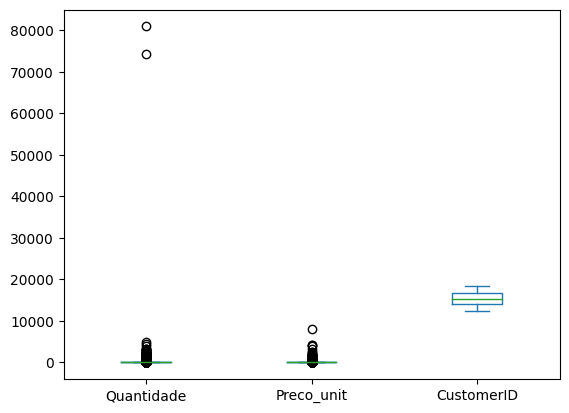

In [25]:
df_limpo.plot.box()

In [45]:
#Função de interquartil range
def is_outlier(array, extreme=False):

  q1,q3 = np.quantile(array, [.25,.75])
  iqr = q3-q1

  factor = 1.5 if extreme else 1.5
  upper_outlier = q3 + factor*iqr
  lower_outlier = q1 - factor*iqr

  return (array < lower_outlier) | (array > upper_outlier)

In [44]:
#contando os out liers na coluna quantidade
is_outlier(df_limpo.Quantidade).sum()

25616

In [46]:
#contando os out liers na coluna Preco_unit
is_outlier(df_limpo.Preco_unit).sum()

34112

In [47]:
#Aplicando a função de outiers
outliers_preco_unit = is_outlier(df_limpo['Preco_unit'])
outliers_quantidade = is_outlier(df_limpo['Quantidade'])

In [48]:
#linha a linha
outlier_rows = df_limpo[outliers_preco_unit | outliers_quantidade]

In [49]:
print(outlier_rows)

       Cod_fatura Cod_Estoque                         Descrição  Quantidade  \
5          536365       22752      SET 7 BABUSHKA NESTING BOXES           2   
9          536367       84879     ASSORTED COLOUR BIRD ORNAMENT          32   
16         536367       22622    BOX OF VINTAGE ALPHABET BLOCKS           2   
19         536367       21777       RECIPE BOX WITH METAL HEART           4   
20         536367       48187               DOORMAT NEW ENGLAND           4   
...           ...         ...                               ...         ...   
541865     581583       20725           LUNCH BAG RED RETROSPOT          40   
541866     581583       85038   6 CHOCOLATE LOVE HEART T-LIGHTS          36   
541867     581584       20832  RED FLOCK LOVE HEART PHOTO FRAME          72   
541868     581584       85038   6 CHOCOLATE LOVE HEART T-LIGHTS          48   
541892     581586       21217     RED RETROSPOT ROUND CAKE TINS          24   

                Data_compra  Preco_unit  CustomerID

In [32]:
# Removendo as linhas em que 'Quantidade' é superior a 10000 e 'Preco_unit' é superior a 5000
df_clean = df_limpo[(df_limpo['Quantidade'] <= 10000) & (df_limpo['Preco_unit'] <= 5000)]

#novo data set

print(df_clean)


       Cod_fatura Cod_Estoque                            Descrição  \
0          536365      85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1          536365       71053                  WHITE METAL LANTERN   
2          536365      84406B       CREAM CUPID HEARTS COAT HANGER   
3          536365      84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4          536365      84029E       RED WOOLLY HOTTIE WHITE HEART.   
...           ...         ...                                  ...   
541904     581587       22613          PACK OF 20 SPACEBOY NAPKINS   
541905     581587       22899         CHILDREN'S APRON DOLLY GIRL    
541906     581587       23254        CHILDRENS CUTLERY DOLLY GIRL    
541907     581587       23255      CHILDRENS CUTLERY CIRCUS PARADE   
541908     581587       22138        BAKING SET 9 PIECE RETROSPOT    

        Quantidade          Data_compra  Preco_unit  CustomerID  \
0                6  2010-01-12 08:26:00        2.55     17850.0   
1                6  2010-

<AxesSubplot:>

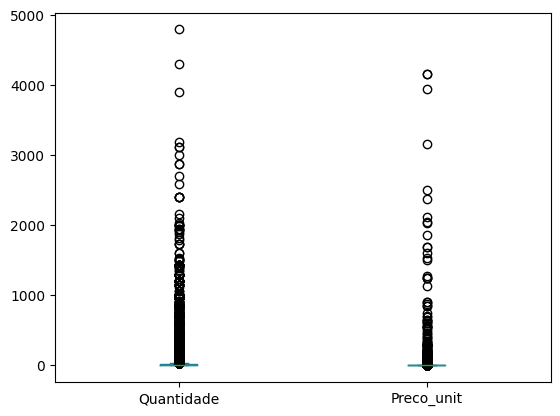

In [54]:
df_clean[["Quantidade","Preco_unit"]].plot.box()

In [71]:
#CRIANDO COLUNA DE TOTAL DE COMPRA
df_clean_copy = df_clean.copy()


df_clean_copy['Total da compra'] = df_clean_copy['Quantidade'] * df_clean_copy['Quantidade']


df_clean = df_clean_copy


df_clean.head()

,Cod_fatura,Cod_Estoque,Descrição,Quantidade,Data_compra,Preco_unit,CustomerID,Pais,Total,Total da compra
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,36,36
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,36,36
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,64,64
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,36,36
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,36,36


In [101]:
Maior_valor_pais = df_clean.groupby("Pais")["Total da compra"].sum()
Maior_valor_pais = Maior_valor_pais.sort_values(ascending=False)

print(Maior_valor_pais)

Pais
United Kingdom          673229642
Netherlands              45927283
Australia                17473399
EIRE                     15163791
Japan                    12592774
Sweden                   10327470
France                    5203298
Germany                   4384974
Spain                     1608841
Switzerland               1145976
Norway                     896576
Belgium                    641199
Channel Islands            504135
Finland                    469040
Denmark                    462995
Cyprus                     399060
Portugal                   382935
Canada                     377447
Singapore                  295105
Austria                    244921
Italy                      227014
Israel                     131775
Iceland                     97552
Poland                      74220
USA                         57246
Unspecified                 32341
Greece                      25233
Czech Republic              25173
United Arab Emirates        24608
Lithuania

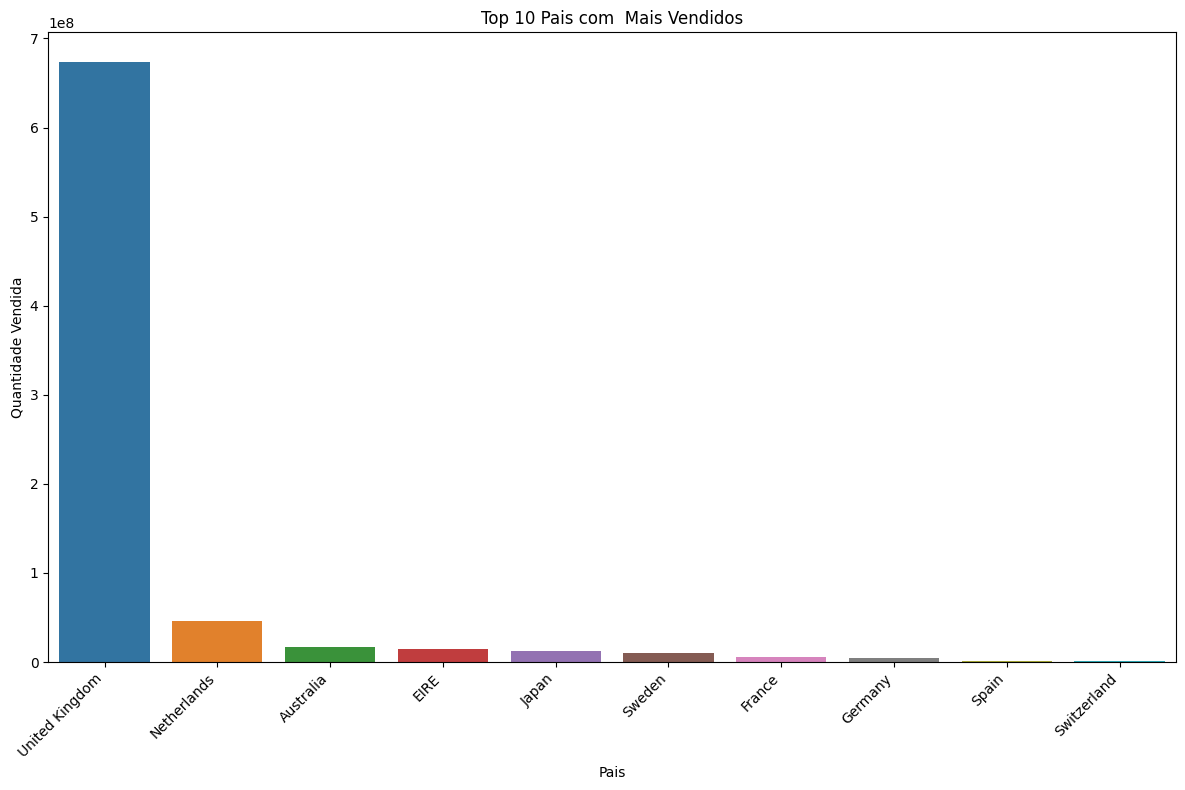

In [102]:
# Selecionar os top 10 produtos mais vendidos
Maior_valor_pais  = Maior_valor_pais .head(10)

# Criando o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=Maior_valor_pais.index, y=Maior_valor_pais .values)
plt.xlabel('Pais')
plt.ylabel('Quantidade Vendida')
plt.title('Top 10 Pais com  Mais Vendidos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [97]:
# Agrupar os dados por produto e somar as quantidades vendidas
produtos_mais_vendidos = df_clean.groupby('Descrição')['Quantidade'].sum()

# Classificar os produtos com base nas quantidades vendidas
produtos_mais_vendidos = produtos_mais_vendidos.sort_values(ascending=False)

# Visualizar os top produtos mais vendidos
print(produtos_mais_vendidos)


Descrição
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
                                      ...  
PINK POLKADOT KIDS BAG                    1
WHITE ROSEBUD  PEARL EARRINGS             1
HEN HOUSE W CHICK IN NEST                 1
CAPIZ CHANDELIER                          1
EASTER CRAFT IVY WREATH WITH CHICK        1
Name: Quantidade, Length: 3876, dtype: int64


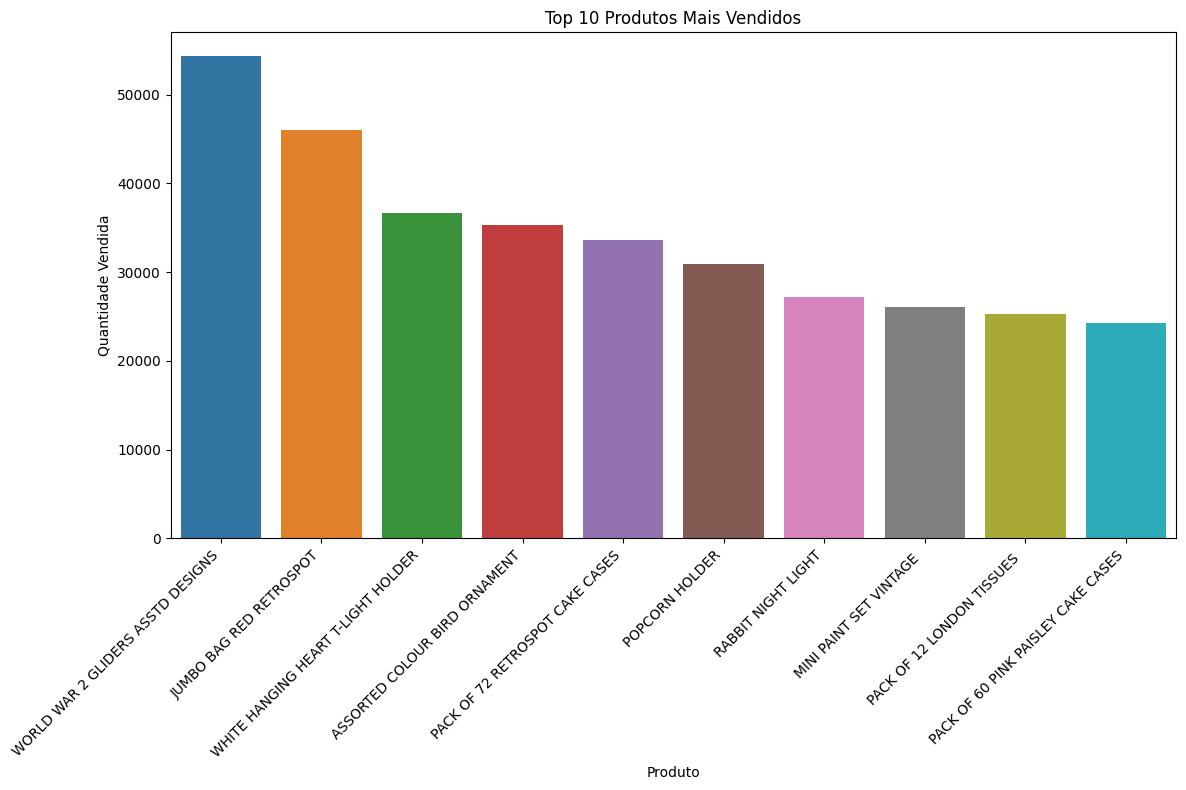

In [94]:
# Selecionar os top 10 produtos mais vendidos
top_10_produtos = produtos_mais_vendidos.head(10)

# Criando o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_produtos.index, y=top_10_produtos.values)
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()